In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords') # Corrected function name to download stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english')) # Corrected function name to get English stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold # Corrected typo in function name
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
df = pd.read_csv('/content/Large language models (2024) (1).csv', encoding='latin-1')

In [4]:
print(df)

                      Model Comapany   Arch Parameters Tokens       Ratio  \
0                   Olympus   Amazon    TBA       2000   40000      20:01   
1                     GPT-5   OpenAI    TBA       2000     TBA        TBA   
2                     GPT-6   OpenAI    TBA        TBA     TBA        TBA   
3    AuroraGPT (ScienceGPT)      ANL    TBA       1000     TBA        TBA   
4                    Grok-2      xAI    TBA        TBA     TBA        TBA   
..                      ...      ...    ...        ...     ...        ...   
337                 RoBERTa  Meta AI  Dense      0.355    2200    6,198:1   
338                   GPT-2   OpenAI  Dense        1.5      10       7:01   
339                    BERT   Google  Dense        0.3     137  457:01:00   
340                   GPT-1   OpenAI  Dense      0.117   0.003       1:01   
341                  ULMFiT  Fast.ai  Dense      0.034     0.1       3:01   

    ALScore                Training dataset Release Date  \
0      29.8    

In [5]:
df.describe()

,Model,Comapany,Arch,Parameters,Tokens,Ratio,ALScore,Training dataset,Release Date,Notes,Playground
count,342,342,342,327,255,249,252,340,342,313,249
unique,340,122,5,127,102,101,44,21,48,305,222
top,MPT,Google,Dense,7,2000,20:01,0.4,"Wikipedia, books, common crawl",24-Apr,Chatbot,https://chat.openai.com/
freq,2,25,310,29,36,24,22,257,23,3,5


In [6]:
df.dtypes

Model               object
Comapany            object
Arch                object
Parameters          object
Tokens              object
Ratio               object
ALScore             object
Training dataset    object
Release Date        object
Notes               object
Playground          object
dtype: object

In [7]:
df.head()

,Model,Comapany,Arch,Parameters,Tokens,Ratio,ALScore,Training dataset,Release Date,Notes,Playground
0,Olympus,Amazon,TBA,2000,40000,20:01,29.8,TBA,TBA,New related Titan details: '$65m training run....,https://lifearchitect.ai/olympus/
1,GPT-5,OpenAI,TBA,2000,TBA,TBA,TBA,TBA,TBA,Due 2024.,https://lifearchitect.ai/gpt-5/
2,GPT-6,OpenAI,TBA,TBA,TBA,TBA,TBA,TBA,TBA,Due 2025.,https://lifearchitect.ai/gpt-6/
3,AuroraGPT (ScienceGPT),ANL,TBA,1000,TBA,TBA,TBA,TBA,TBA,https://tpc.dev/2023/11/10/tpc-announced-with-...,https://www.hpcwire.com/2023/11/13/training-of...
4,Grok-2,xAI,TBA,TBA,TBA,TBA,TBA,TBA,TBA,Due 2025.,https://twitter.com/elonmusk/status/1773655245...


In [8]:
df.tail()

,Model,Comapany,Arch,Parameters,Tokens,Ratio,ALScore,Training dataset,Release Date,Notes,Playground
337,RoBERTa,Meta AI,Dense,0.355,2200,"6,198:1",0.1,"Wikipedia, books, common crawl",19-Jul,"calcs: ""In total, this batch size and number o...",Hugging Face
338,GPT-2,OpenAI,Dense,1.5,10,7:01,0,Reddit,19-Feb,Reddit outbound only,Hugging Face
339,BERT,Google,Dense,0.3,137,457:01:00,0,"Wikipedia, books",18-Oct,NaN,Hugging Face
340,GPT-1,OpenAI,Dense,0.117,0.003,1:01,0,Books,18-Jun,"Books only. ""We train for 100 epochs on miniba...",Hugging Face
341,ULMFiT,Fast.ai,Dense,0.034,0.1,3:01,0,Wikipedia,18-Jan,Aussie Prof Jeremy Howard: https://www.abc.net...,NaN


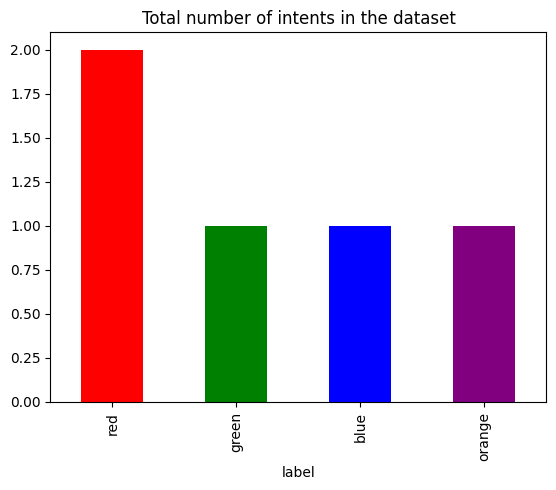

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

# Assuming you have your data ready, create a DataFrame
# Replace this with your actual data loading logic
data = {'label': ['red', 'green', 'blue', 'red', 'orange']}
df = pd.DataFrame(data)

# Now you can use df
df['label'].value_counts().plot.bar(color=['red', 'green', 'blue', 'purple', 'orange'])
plt.title('Total number of intents in the dataset')
plt.show()

In [10]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Define input text
input_text = "Once upon a time"

# Tokenize input text
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate text
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, early_stopping=True)

# Decode and print generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated text:", generated_text)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text: Once upon a time, the world was a place of great beauty and great danger. The world of the gods was the place where the great gods were born, and where they were to live.

The world that was created was not the same as the one that is now. It was an endless, endless world. And the Gods were not born of nothing. They were created of a single, single thing. That was why the universe was so beautiful. Because the cosmos was made of two


In [11]:
!pip install transformers datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [12]:
import pandas as pd

# Try different encodings
df = pd.read_csv('/content/Large language models (2024) (1).csv', encoding='latin-1')
# or
# df = pd.read_csv('/content/Large language models (2024) (1).csv', encoding='utf-16')
# or
# df = pd.read_csv('/content/Large language models (2024) (1).csv', encoding='iso-8859-1')

# If you're unsure of the encoding, try 'chardet'
!pip install chardet
import chardet
with open('/content/Large language models (2024) (1).csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)
# Use the encoding suggested by 'chardet' in the pd.read_csv function

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [1]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
# Define input text
input_text = "Hello, how are you today?"

# Tokenize input text
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate response
output = model.generate(input_ids, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2, early_stopping=True)

# Decode and print the output
response = tokenizer.decode(output[0], skip_special_tokens=True)
print("Model response:", response)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Model response: Hello, how are you today?

I'm so happy to be here. I'm really happy.
 (laughs)
...
, I think I've got a lot of work to do. It's been a long time


In [3]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


In [4]:
!openai migrate

Retrieving Grit CLI metadata from https://api.keygen.sh/v1/accounts/custodian-dev/artifacts/marzano-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/gouda-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/marzano-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/cli-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/timekeeper-linux-x64
Fetching release URL from: https://api.keygen.sh//v1/accounts/custodian-dev/artifacts/workflow_runner-linux-x64



Analyzing Finding files                                                         
Processed 0 files and found 0 matches


In [5]:
# Install the openai package if not already installed
# pip install openai

import openai

# Set your OpenAI API key
api_key = "YOUR_OPENAI_API_KEY"
openai.api_key = api_key


In [6]:
# Main loop
print("Chatbot: Hello! How can I assist you today?")
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Chatbot: Goodbye!")
        break

    chat_prompt = f'User: {user_input}\nChatbot:'
    response = get_chat_response(chat_prompt)
    print("Chatbot:", response)


Chatbot: Hello! How can I assist you today?
You: bye
Chatbot: Goodbye!


In [7]:
def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0.7):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]


In [8]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context)
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600,
        style={'background-color': '#F6F6F6'})))

    return pn.Column(*panels)


In [9]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display


context = [ {'role':'system', 'content':"""
               I want you to act as an interviewing agent, named Tom,
               for an AI services company.
               You are interviewing candidates, appearing in the interview.
               I want you to only ask questions as the interviewer related to AI.
               Ask one questions at a time.

"""} ]


In [10]:
pip install panel


In [11]:
import panel as pn

pn.extension()

# Initialize an empty list to hold the conversation
conversation = []

# Dictionary to hold predefined responses or AI logic
responses = {
    "greeting": "Hello! How can I assist you today?",
    "thanks": "You're welcome! Is there anything else I can help you with?",
    "default": "I'm sorry, I didn't quite understand that. Could you please rephrase?",
}

# Function to handle user input and generate responses
def handle_input(input_text):
    # Add user input to the conversation
    conversation.append({'role': 'user', 'content': input_text})

    # Generate a response based on input
    response = generate_response(input_text)

    # Add the chatbot's response to the conversation
    conversation.append({'role': 'system', 'content': response})

    # Update the panel to display the conversation
    update_panel()

# Function to generate a response based on user input
def generate_response(input_text):
    # Simple logic to determine response based on keywords
    if any(word in input_text.lower() for word in ['hello', 'hi', 'hey']):
        return responses["greeting"]
    elif any(word in input_text.lower() for word in ['thank', 'thanks']):
        return responses["thanks"]
    else:
        return responses["default"]

# Function to update the panel content
def update_panel():
    content = "\n\n".join([f"{msg['role']}: {msg['content']}" for msg in conversation])
    chat_box.object = content

# Define initial instructions
initial_instructions = """
Welcome! I'm your customer service chatbot.
Feel free to ask me anything or start a conversation!
"""

# Create the chat interface with initial instructions
chat_box = pn.pane.Markdown(initial_instructions, width=600, height=400)

# Create an input box for user responses
input_box = pn.widgets.TextInput(placeholder='Type your response here...', width=600)

# Button to submit the response
submit_button = pn.widgets.Button(name='Submit', button_type='primary', width=100)
submit_button.on_click(lambda event: handle_input(input_box.value))

# Combine input and submit button into a row
input_row = pn.Row(input_box, submit_button)

# Combine chat box and input row into a column layout
layout = pn.Column(chat_box, input_row)

# Display the panel
layout.servable()


Column
    [0] Markdown(str, height=400, sizing_mode='fixed', width=600)
    [1] Row
        [0] TextInput(placeholder='Type your response h..., width=600)
        [1] Button(button_type='primary', name='Submit', width=100)